#"Tv-Show Recommendation System based on (predicted) Popularity score."


#Data Information
Data Loading

Goals:

For logistic Regression, the goal is to show all the recommended tv shows based on a threshold and conditions that are set.

For RandomForest and KNN, the goal is to recommand tv-shows based on a predidec popularity score

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the dataset
data = pd.read_csv('TMDB_tv_dataset_v3.csv')
data.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,Winter Is Coming,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,The perfect robbery.,"Crime, Drama",Álex Pina,es,"Netflix, Antena 3",ES,Español,Vancouver Media,Spain,70
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,Every ending has a beginning.,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,Fight the dead. Fear the living.,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,It's good to be bad.,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45


#Data Preprocessing

In [ ]:
# Shape of the dataset (number of feature, attributes)
data.shape

(165560, 29)

In [ ]:
# Displaying basic info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165560 entries, 0 to 165559
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    165560 non-null  int64  
 1   name                  165555 non-null  object 
 2   number_of_seasons     165560 non-null  int64  
 3   number_of_episodes    165560 non-null  int64  
 4   original_language     165560 non-null  object 
 5   vote_count            165560 non-null  int64  
 6   vote_average          165560 non-null  float64
 7   overview              92237 non-null   object 
 8   adult                 165560 non-null  bool   
 9   backdrop_path         76762 non-null   object 
 10  first_air_date        134213 non-null  object 
 11  last_air_date         136062 non-null  object 
 12  homepage              50450 non-null   object 
 13  in_production         165560 non-null  bool   
 14  original_name         165555 non-null  object 
 15  

In [ ]:
# Displaying Statistic summary for numerical values
stat_data = data.drop(columns=['id'])
stat_data.describe()

,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time
count,165560.000000,165560.000000,165560.000000,165560.000000,165560.000000,165560.000000
mean,1.553352,24.728503,13.550151,2.366990,5.785909,22.877023
std,2.955145,135.975123,192.566606,3.466316,39.813579,47.590589
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.600000,0.000000
50%,1.000000,6.000000,0.000000,0.000000,0.855000,2.000000
75%,1.000000,20.000000,1.000000,6.000000,2.417000,42.000000
max,240.000000,20839.000000,21857.000000,10.000000,3707.008000,6032.000000


In [ ]:
# Check for missing values in dataset
data.isnull().sum().sort_values(ascending=False)

tagline                 160262
created_by              129558
homepage                115110
production_companies    107039
production_countries     89170
backdrop_path            88798
overview                 73323
networks                 69048
genres                   67208
poster_path              58786
spoken_languages         57798
languages                57051
first_air_date           31347
origin_country           31023
last_air_date            29498
name                         5
original_name                5
status                       0
id                           0
type                         0
popularity                   0
in_production                0
adult                        0
vote_average                 0
vote_count                   0
original_language            0
number_of_episodes           0
number_of_seasons            0
episode_run_time             0
dtype: int64

In [ ]:
#representing missing values by percentage
percentage = (data.isnull().sum() / len(data)) * 100
percentage.sort_values(ascending=False)

tagline                 96.799952
created_by              78.254409
homepage                69.527664
production_companies    64.652694
production_countries    53.859628
backdrop_path           53.634936
overview                44.287871
networks                41.705726
genres                  40.594346
poster_path             35.507369
spoken_languages        34.910606
languages               34.459410
first_air_date          18.933921
origin_country          18.738222
last_air_date           17.817106
name                     0.003020
original_name            0.003020
status                   0.000000
id                       0.000000
type                     0.000000
popularity               0.000000
in_production            0.000000
adult                    0.000000
vote_average             0.000000
vote_count               0.000000
original_language        0.000000
number_of_episodes       0.000000
number_of_seasons        0.000000
episode_run_time         0.000000
dtype: float64

In [ ]:
# Dropping rows with high missing values with more than 50% missing values and non important
to_drop = ['tagline', 'created_by', 'backdrop_path', 'spoken_languages', 'poster_path', 'production_countries', 'languages', 'networks',  'first_air_date', 'last_air_date', 'production_companies', 'origin_country', 'homepage', 'original_name']
# creating new data frame to hold reaming columns
df = data.drop(columns=to_drop)
df.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,in_production,popularity,type,status,genres,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,False,1083.917,Scripted,Ended,"Sci-Fi & Fantasy, Drama, Action & Adventure",0
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,False,96.354,Scripted,Ended,"Crime, Drama",70
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,True,185.711,Scripted,Returning Series,"Drama, Sci-Fi & Fantasy, Mystery",0
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,False,489.746,Scripted,Ended,"Action & Adventure, Drama, Sci-Fi & Fantasy",42
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,False,416.668,Scripted,Ended,"Crime, Sci-Fi & Fantasy",45


In [ ]:
# Shape of new dataframe
# Dropped 12 columns
df.shape

(165560, 15)

In [ ]:
#representing missing values by percentage
percentage = (df.isnull().sum() / len(df)) * 100
percentage.sort_values(ascending=False)

overview              44.287871
genres                40.594346
name                   0.003020
id                     0.000000
number_of_seasons      0.000000
number_of_episodes     0.000000
original_language      0.000000
vote_count             0.000000
vote_average           0.000000
adult                  0.000000
in_production          0.000000
popularity             0.000000
type                   0.000000
status                 0.000000
episode_run_time       0.000000
dtype: float64

In [ ]:
# Since the remaining columns have low perscentage of missing values
# deciding to perfrom imputations
# For text based data replace null with ''
df['overview'].fillna('', inplace=True)
df['name'].fillna('', inplace=True)
# *For categorical data replace with mode
df['genres'].fillna(df['genres'].mode()[0], inplace=True)

In [ ]:
# dropped these features because they can't be replaced by the mode
df.drop(['overview', 'name', 'genres'], axis=1)

,id,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,adult,in_production,popularity,type,status,episode_run_time
0,1399,8,73,en,21857,8.442,False,False,1083.917,Scripted,Ended,0
1,71446,3,41,es,17836,8.257,False,False,96.354,Scripted,Ended,70
2,66732,4,34,en,16161,8.624,False,True,185.711,Scripted,Returning Series,0
3,1402,11,177,en,15432,8.121,False,False,489.746,Scripted,Ended,42
4,63174,6,93,en,13870,8.486,False,False,416.668,Scripted,Ended,45
...,...,...,...,...,...,...,...,...,...,...,...,...
165555,238318,1,1,en,0,0.000,False,True,1.771,Scripted,Returning Series,0
165556,238319,1,16,de,0,0.000,False,False,0.600,Documentary,Canceled,0
165557,238320,1,18,de,0,0.000,False,False,0.600,Documentary,Canceled,0
165558,238321,1,5,de,0,0.000,False,False,0.600,Talk Show,Ended,0


In [ ]:
df.isnull().sum()

id                    0
name                  0
number_of_seasons     0
number_of_episodes    0
original_language     0
vote_count            0
vote_average          0
overview              0
adult                 0
in_production         0
popularity            0
type                  0
status                0
genres                0
episode_run_time      0
dtype: int64

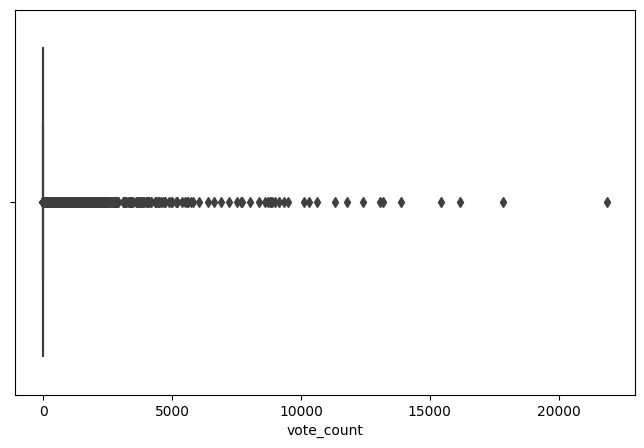

In [ ]:
# Box plot for vote_count
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['vote_count'])
plt.show()

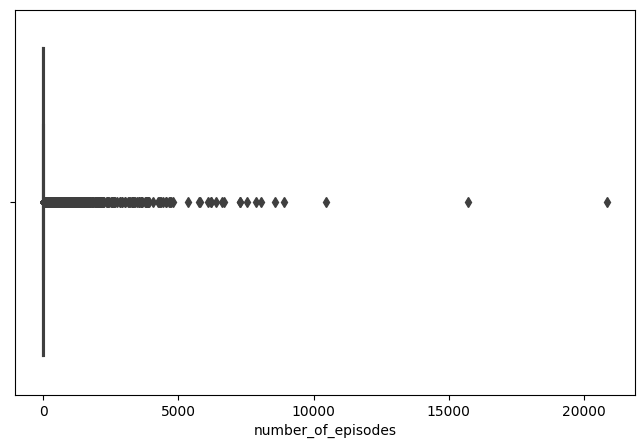

In [ ]:
# Box plot for number_of_episodes
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['number_of_episodes'])
plt.show()

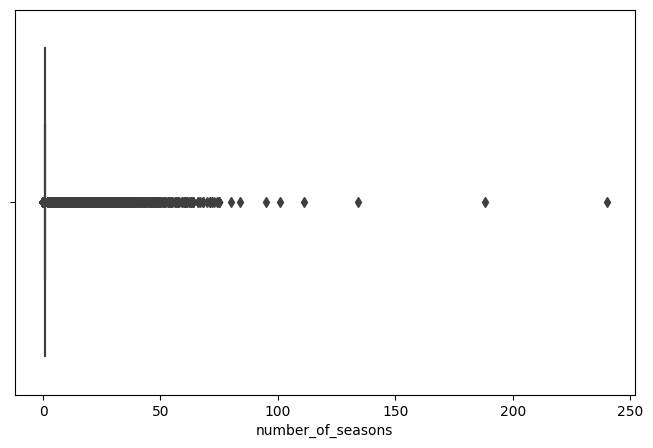

In [ ]:
# Box plot for number_of_seasons
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['number_of_seasons'])
plt.show()

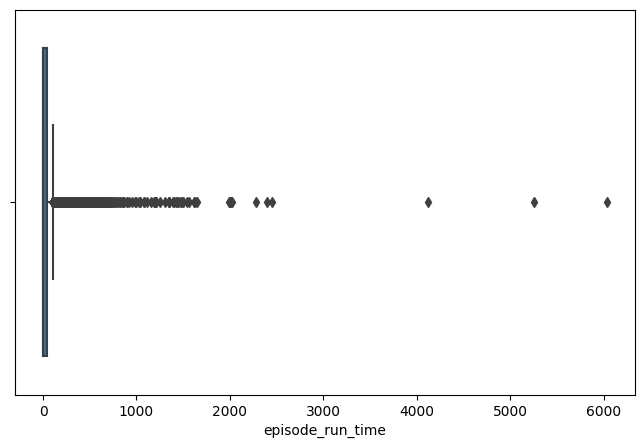

In [ ]:
# Box plot for episode_run_time
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['episode_run_time'])
plt.show()

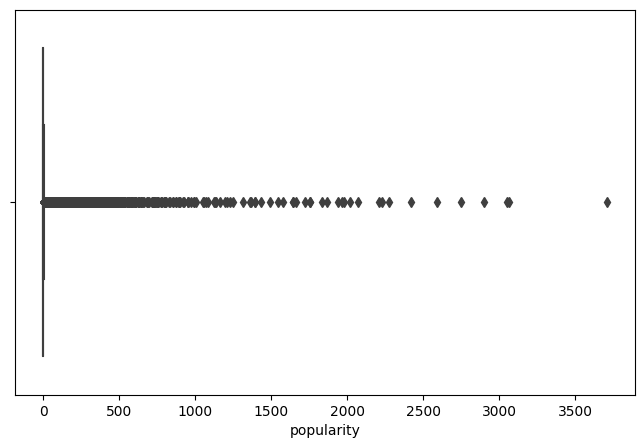

In [ ]:
# Box plot for popularity
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['popularity'])
plt.show()

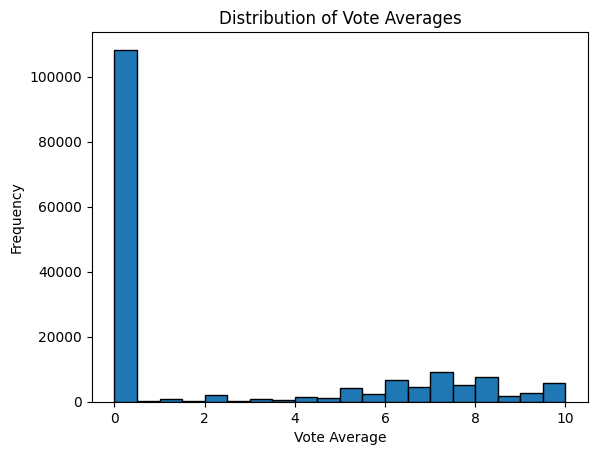

In [ ]:
# Histogram of vote_average with 0
plt.hist(df['vote_average'], bins=20, edgecolor='black')
plt.title('Distribution of Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

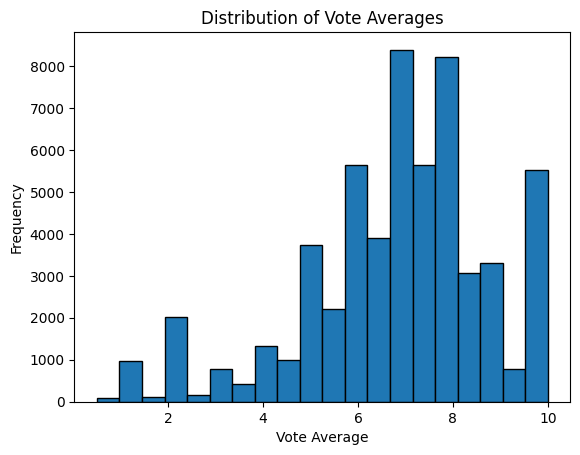

In [ ]:
# Histogram of vote_average without 0
drop = df[df['vote_average'] != 0]
plt.hist(drop['vote_average'], bins=20, edgecolor='black')
plt.title('Distribution of Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

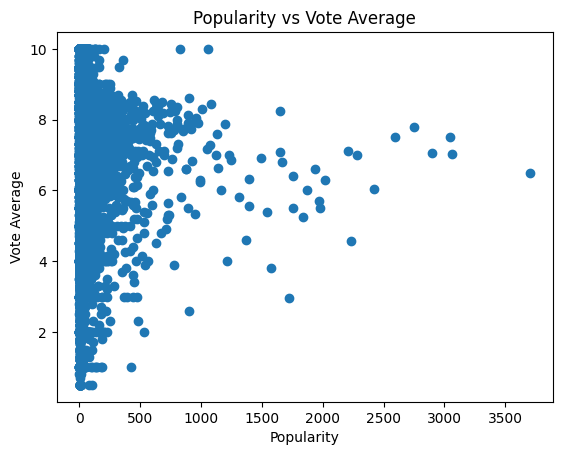

In [ ]:
# Scatter plot of popularity vs vote_average
plt.scatter(drop['popularity'], drop['vote_average'])
plt.title('Popularity vs Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.show()

In [ ]:
df.describe()

,id,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time
count,165560.000000,165560.000000,165560.000000,165560.000000,165560.000000,165560.000000,165560.000000
mean,108788.203177,1.553352,24.728503,13.550151,2.366990,5.785909,22.877023
std,74872.178581,2.955145,135.975123,192.566606,3.466316,39.813579,47.590589
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45025.750000,1.000000,1.000000,0.000000,0.000000,0.600000,0.000000
50%,95834.500000,1.000000,6.000000,0.000000,0.000000,0.855000,2.000000
75%,158757.250000,1.000000,20.000000,1.000000,6.000000,2.417000,42.000000
max,239693.000000,240.000000,20839.000000,21857.000000,10.000000,3707.008000,6032.000000


In [ ]:
#Dealing with outliers
''''
from scipy.stats import zscore
treshold = 3
get_zscore = ['number_of_episodes', 'number_of_seasons', 'episode_run_time', 'vote_count', 'vote_average']
zscore_df = df[get_zscore].apply(zscore)
outliers = pd.DataFrame(index=zscore_df.index)
for column in get_zscore:
  outliers = (zscore_df[column] > treshold) | (zscore_df[column] < -treshold)
'''''

"'\nfrom scipy.stats import zscore\ntreshold = 3\nget_zscore = ['number_of_episodes', 'number_of_seasons', 'episode_run_time', 'vote_count', 'vote_average']\nzscore_df = df[get_zscore].apply(zscore)\noutliers = pd.DataFrame(index=zscore_df.index)\nfor column in get_zscore:\n  outliers = (zscore_df[column] > treshold) | (zscore_df[column] < -treshold)\n"

In [ ]:
''''
# Dealing with outliers using Imputation
df['number_of_episodes'] = np.where(outliers, df['number_of_episodes'].mean(), df['number_of_episodes'])
df['number_of_seasons'] = np.where(outliers, df['number_of_seasons'].mean(), df['number_of_seasons'])
df['episode_run_time'] = np.where(outliers, df['episode_run_time'].mean(), df['episode_run_time'])
df['vote_count'] = np.where(outliers, df['vote_count'].mean(), df['vote_count'])
df['vote_average'] = np.where(outliers, df['vote_average'].mean(), df['vote_average'])
'''''

"'\n# Dealing with outliers using Imputation\ndf['number_of_episodes'] = np.where(outliers, df['number_of_episodes'].mean(), df['number_of_episodes'])\ndf['number_of_seasons'] = np.where(outliers, df['number_of_seasons'].mean(), df['number_of_seasons'])\ndf['episode_run_time'] = np.where(outliers, df['episode_run_time'].mean(), df['episode_run_time'])\ndf['vote_count'] = np.where(outliers, df['vote_count'].mean(), df['vote_count'])\ndf['vote_average'] = np.where(outliers, df['vote_average'].mean(), df['vote_average'])\n"

In [ ]:
# The dataset, informs us that colums like 'vote_count', 'vote_average', 'number_of_episode'
# 'number_of_seasons', 'episode_run_time'  have values If 0, no data was available for that instance
# Counts
zero_val_count = (df[['vote_count', 'vote_average', 'number_of_episodes', 'number_of_seasons', 'episode_run_time']] == 0).sum()
zero_val_count.sort_values(ascending=False)

vote_count            108279
vote_average          108275
episode_run_time       82605
number_of_episodes     24006
number_of_seasons      22398
dtype: int64

In [ ]:
# Due the high amount of 0 in number of season, with really doesn't make sense
# in the real-life approach, and also 0 in number_of_episode and episode_run_time
# we'll impute them using mean or median

# Replace zero values with the median in 'number_of_episodes'
df['number_of_episodes'] = df['number_of_episodes'].replace(0, df['number_of_episodes'].median())

# Replace zero values with the median in 'number_of_seasons'
df['number_of_seasons'] = df['number_of_seasons'].replace(0, df['number_of_seasons'].median())

# Replace zero values with the median in 'episode_run_time'
df['episode_run_time'] = df['episode_run_time'].replace(0, df['episode_run_time'].median())

In [ ]:
zero_val_count = (df[['vote_count', 'vote_average', 'number_of_episodes', 'number_of_seasons', 'episode_run_time', 'popularity']] == 0).sum()
zero_val_count.sort_values(ascending=False)

vote_count            108279
vote_average          108275
popularity              2257
number_of_episodes         0
number_of_seasons          0
episode_run_time           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165560 entries, 0 to 165559
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  165560 non-null  int64  
 1   name                165560 non-null  object 
 2   number_of_seasons   165560 non-null  int64  
 3   number_of_episodes  165560 non-null  int64  
 4   original_language   165560 non-null  object 
 5   vote_count          165560 non-null  int64  
 6   vote_average        165560 non-null  float64
 7   overview            165560 non-null  object 
 8   adult               165560 non-null  bool   
 9   in_production       165560 non-null  bool   
 10  popularity          165560 non-null  float64
 11  type                165560 non-null  object 
 12  status              165560 non-null  object 
 13  genres              165560 non-null  object 
 14  episode_run_time    165560 non-null  int64  
dtypes: bool(2), float64(2), int64(5), 

# Feature Engineering

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
# Selecting necessary features
selected_features = ['number_of_seasons', 'number_of_episodes', 'vote_average', 'popularity', 'type', 'episode_run_time']
shows = df[selected_features]
shows.head()

,number_of_seasons,number_of_episodes,vote_average,popularity,type,episode_run_time
0,8,73,8.442,1083.917,Scripted,2
1,3,41,8.257,96.354,Scripted,70
2,4,34,8.624,185.711,Scripted,2
3,11,177,8.121,489.746,Scripted,42
4,6,93,8.486,416.668,Scripted,45


In [ ]:
# Since 'type' is a categorical data
# We need to transform it to numerical
# For this we'll use one-hot-encoding
# Using MultiLabelBinarizer to perform one-hot encoding on the 'type' column
mlb = MultiLabelBinarizer()

# Perform one-hot encoding for the 'type' column
shows = pd.get_dummies(shows, columns=['type'], prefix='type')

In [ ]:
shows.head()

,number_of_seasons,number_of_episodes,vote_average,popularity,episode_run_time,type_Documentary,type_Miniseries,type_News,type_Reality,type_Scripted,type_Talk Show,type_Video
0,8,73,8.442,1083.917,2,0,0,0,0,1,0,0
1,3,41,8.257,96.354,70,0,0,0,0,1,0,0
2,4,34,8.624,185.711,2,0,0,0,0,1,0,0
3,11,177,8.121,489.746,42,0,0,0,0,1,0,0
4,6,93,8.486,416.668,45,0,0,0,0,1,0,0


In [ ]:
shows.columns

Index(['number_of_seasons', 'number_of_episodes', 'vote_average', 'popularity',
       'episode_run_time', 'type_Documentary', 'type_Miniseries', 'type_News',
       'type_Reality', 'type_Scripted', 'type_Talk Show', 'type_Video'],
      dtype='object')

In [ ]:
# Split data into training, testing, and validation set
X = shows.drop(['popularity'], axis=1)
y = shows['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

#Model Selection

In [ ]:
#Model 1: Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Create a RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training set
rf_regressor.fit(X_train, y_train)

# Predict on the training set
predictions_train = rf_regressor.predict(X_train)

# Calculate mean squared error on the training set
mse_train = mean_squared_error(y_train, predictions_train)
print(f"Mean Squared Error on Training Set: {mse_train}")

# Predict on the test set
predictions_test = rf_regressor.predict(X_test)

# Calculate mean squared error on the test set
mse_test = mean_squared_error(y_test, predictions_test)
print(f"Mean Squared Error on Test Set: {mse_test}")

# AMSE
mae = mean_absolute_error(y_test, predictions_test)
print(f"Mean Absolute Error: {mae:.2f}")

# r-squared error
print("R2:", r2_score(y_test, predictions_test))

# Variance score
print("Explained Variance Score:", explained_variance_score(y_test, predictions_test))

Mean Squared Error on Training Set: 308.2613702141147
Mean Squared Error on Test Set: 890.5126877089547
Mean Absolute Error: 5.17
R2: 0.025926442680696327
Explained Variance Score: 0.026344070535960884


In [ ]:
from sklearn.model_selection import cross_val_score
# Combine the training and test sets for cross-validation
X_combined = np.vstack((X_train, X_test))
y_combined = np.concatenate((y_train, y_test))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_regressor, X_combined, y_combined, cv=5, scoring='neg_mean_squared_error')

# Convert the scores to positive values
cv_mse_scores = -cv_scores

# Print the cross-validation MSE scores
print("Cross-Validation Mean Squared Error Scores:")
print(cv_mse_scores)

# Print the average MSE score
print(f"Average Cross-Validation Mean Squared Error: {np.mean(cv_mse_scores)}")

Cross-Validation Mean Squared Error Scores:
[1032.4037189  1592.13487666 1870.18309369  708.16011932  884.91979361]
Average Cross-Validation Mean Squared Error: 1217.5603204358683


In [ ]:
# Model 2: KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

knn = KNeighborsRegressor(n_neighbors=10)

knn.fit(X_train, y_train)

pred_train = knn.predict(X_train)

KNNmseTrain = mean_squared_error(y_train, pred_train)
print(f"Mean Squared Error on Train set: {KNNmseTrain}")

pred_test = knn.predict(X_test)

KNNmseTest = mean_squared_error(y_test, pred_test)
print(f"Mean Squared Error on Test set: {KNNmseTest}")

print("R2:", r2_score(y_test, pred_test))

print("Explained Variance Score:", explained_variance_score(y_test, pred_test))

Mean Squared Error on Train set: 1221.348882594928
Mean Squared Error on Test set: 838.3352156738945
R2: 0.08299996504440066
Explained Variance Score: 0.08324181090197758


In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn, X_combined, y_combined, cv=5, scoring='neg_mean_squared_error')

# Convert the scores to positive values
cv_mse_scores = -cv_scores

# Print the cross-validation MSE scores
print("Cross-Validation Mean Squared Error Scores:")
print(cv_mse_scores)

# Print the average MSE score
print(f"Average Cross-Validation Mean Squared Error: {np.mean(cv_mse_scores)}")

Cross-Validation Mean Squared Error Scores:
[1183.22636655 1441.43540905 1929.04880707  731.03452874  680.72944166]
Average Cross-Validation Mean Squared Error: 1193.094910615601


# Classification

In [ ]:
#Model 3: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
features = ['name', 'number_of_seasons', 'number_of_episodes', 'original_language', 'vote_count', 'vote_average', 'in_production', 'popularity', 'episode_run_time']

In [ ]:
threshold = 8.0
df['recommended'] = (df['vote_average'] >= threshold)
df['recommended'] = df['recommended'].astype(int)

In [ ]:
df['recommended'].value_counts()

0    147377
1     18183
Name: recommended, dtype: int64

In [ ]:
test_df = df[['name', 'number_of_seasons', 'number_of_episodes', 'original_language', 'vote_count', 'vote_average', 'in_production', 'popularity', 'episode_run_time', 'recommended']]

In [ ]:
test_df.shape

(165560, 10)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165560 entries, 0 to 165559
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   name                165560 non-null  object 
 1   number_of_seasons   165560 non-null  int64  
 2   number_of_episodes  165560 non-null  int64  
 3   original_language   165560 non-null  object 
 4   vote_count          165560 non-null  int64  
 5   vote_average        165560 non-null  float64
 6   in_production       165560 non-null  bool   
 7   popularity          165560 non-null  float64
 8   episode_run_time    165560 non-null  int64  
 9   recommended         165560 non-null  int64  
dtypes: bool(1), float64(2), int64(5), object(2)
memory usage: 11.5+ MB


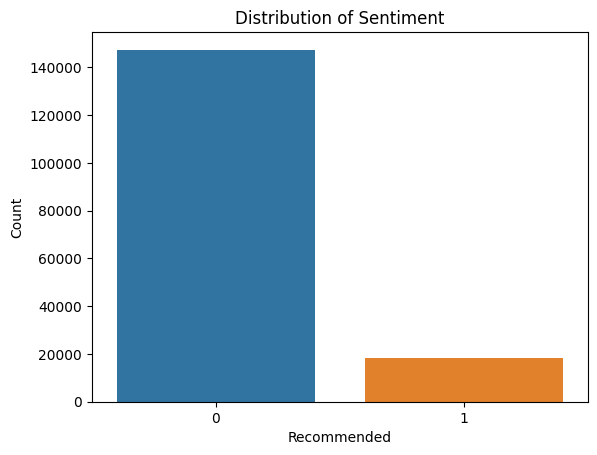

In [ ]:
# Bar chart of 'recommended' counts
sns.countplot(x='recommended', data=df)
plt.xlabel('Recommended')
plt.ylabel('Count')
plt.title('Distribution of Sentiment')
plt.show()

In [ ]:
X = df[features]
y = df['recommended']

In [ ]:
# Identify categorical and numerical features
categorical_features = ['original_language', 'in_production']
numerical_features = ['number_of_seasons', 'number_of_episodes',
                      'vote_count', 'vote_average', 'popularity',
                      'episode_run_time']

# Create a column transformer with preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Append classifier to preprocessing pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

In [ ]:
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-Validation Scores: {scores}")
print(f"Average Score: {scores.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Scores: [0.42175042 0.99060763 0.99166465 0.9941109  0.99251027]
Average Score: 0.8781287750664412


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define your parameter grid
# param_grid = {
#     'classifier__C': [0.01, 0.1, 1, 10, 100],
#     'classifier__penalty': ['l1', 'l2'],
#     'classifier__solver': ['liblinear', 'saga'],
#     'classifier__max_iter': [100, 500, 1000]
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X, y)

# # Best parameters and best score
# print("Best Parameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)

In [ ]:
from sklearn.model_selection import train_test_split

# X contains your features, y contains your labels
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['number_of_seasons',
                                                   'number_of_episodes',
                                                   'vote_count', 'vote_average',
                                                   'popularity',
                                                   'episode_run_time']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['original_language',
                                                   'in_production'])])),
                ('classifier', LogisticRegression())])

In [ ]:
# Make predictions on the validation set
y_val_pred = model.predict(X_val)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Accuracy on the validation set: {accuracy:.2f}')

Accuracy on the validation set: 0.98


In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22096
           1       0.94      0.92      0.93      2738

    accuracy                           0.98     24834
   macro avg       0.96      0.96      0.96     24834
weighted avg       0.98      0.98      0.98     24834



In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
# Print evaluation metrics for test set
print(f"Accuracy for test set: {accuracy:.2f}")

Accuracy for test set: 0.98


In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

In [ ]:
# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f"ROC Curve: {roc_auc}")

ROC Curve: 0.9582823626658148


In [ ]:
# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
print(f"Precision-recall: {pr_auc}")

Precision-recall: 0.9355916322649563


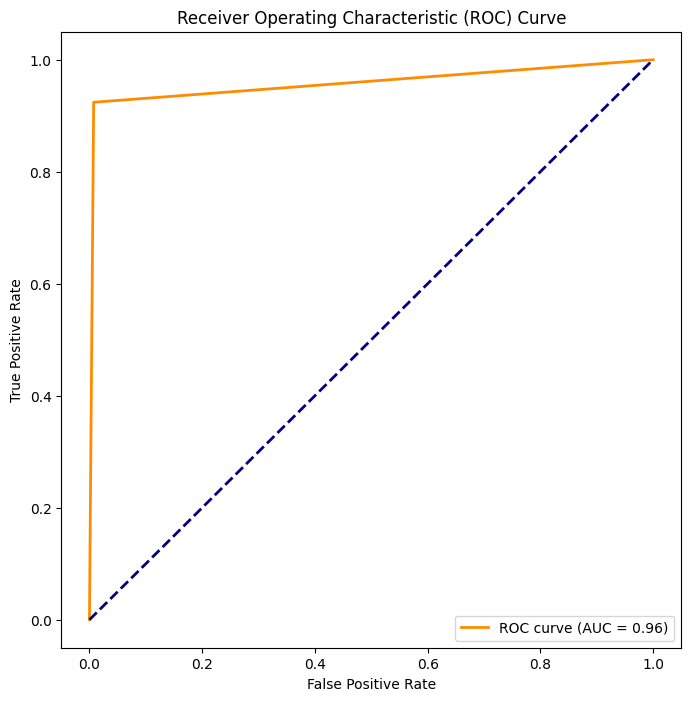

In [ ]:
# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

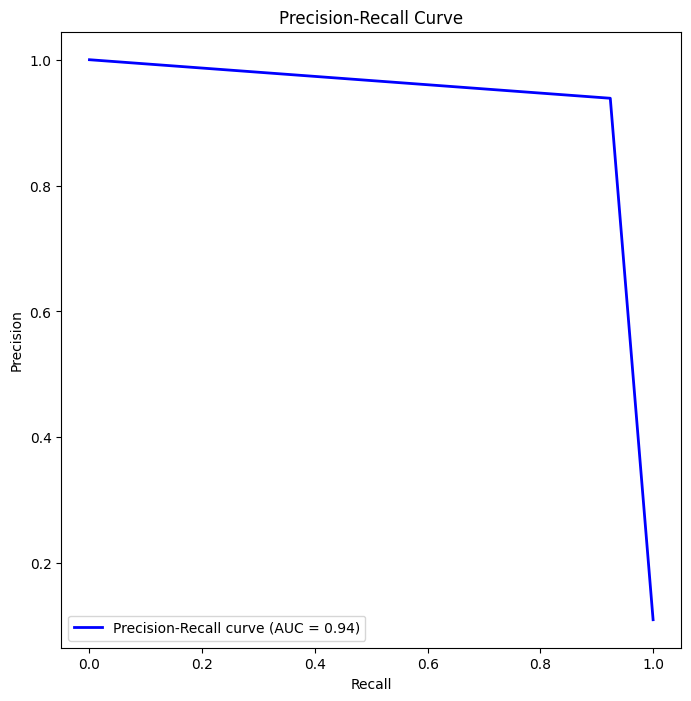

In [ ]:
# Plot Precision-Recall Curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [ ]:
recommended_indices = X_test[y_pred == 1].index

recommended_show_names = df.loc[recommended_indices, 'name']
print("Recommended Show Names:")
print(recommended_show_names)

Recommended Show Names:
50133                        Deep Brains
40945                                 O'
648               Steven Universe Future
3882                         Never Twice
44062            The Longevity Blueprint
                      ...               
13209                     Momokyun Sword
29595                          仮面ライダーカブト
18598    Super Sentai Strongest Battle!!
47088                            Camping
37678              L'Évolution en marche
Name: name, Length: 2695, dtype: object


In [ ]:
print(len(recommended_show_names))

2695


#Parameter Tuning

In [ ]:
# #RF Parameter tuning
# from sklearn.model_selection import GridSearchCV
# # Grid Search with Cross Validation
# # Random Forest
# RF_param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# RF_grid_search = GridSearchCV(rf_regressor, RF_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# RF_grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = RF_grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Get the best model
# best_model = RF_grid_search.best_estimator_

In [ ]:
# # Evaluating on the training set
# y_train_pred = best_model.predict(X_train)
# train_mse = mean_squared_error(y_train, y_train_pred)
# print("MSE on Training Set after grid Search:", train_mse)

# # Evaluating on the testing set
# y_test_pred = best_model.predict(X_test)
# test_mse = mean_squared_error(y_test, y_test_pred)
# print("MSE on Testing Set after grid search:", test_mse)

# # AMSE
# mae = mean_absolute_error(y_test, y_test_pred)
# print(f"Mean Absolute Error: {mae:.2f}")